In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
dataset = pd.read_csv("/kaggle/input/mushroom-dataset/mushrooms.csv")

In [3]:
dataset.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
dataset.isnull().sum().sum()

0

In [5]:
dataset["class"].unique()

array(['p', 'e'], dtype=object)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [7]:
dataset.shape

(8124, 23)

<AxesSubplot: xlabel='class', ylabel='Count'>

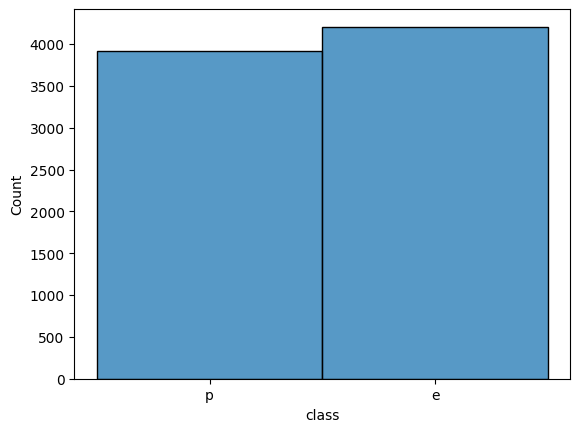

In [8]:
sns.histplot(dataset["class"])

In [9]:
x = dataset.drop(["class"],axis=1)
y  = dataset["class"]
x.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g


In [10]:
x = pd.get_dummies(x)
x.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [11]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y = encoder.fit_transform(y)
print(y)

[1 0 0 ... 0 1 0]


In [12]:
from sklearn.model_selection  import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [13]:
x_test.shape, x_train.shape

((1625, 117), (6499, 117))

In [14]:
y_test.shape, y_train.shape

((1625,), (6499,))

In [15]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
from sklearn.metrics import accuracy_score

In [16]:
clf_gini = DecisionTreeClassifier(criterion="gini", max_depth=3, random_state=0)

In [17]:
clf_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

[Text(0.5769230769230769, 0.875, 'x[27] <= 0.5\ngini = 0.499\nsamples = 6499\nvalue = [3388, 3111]'),
 Text(0.3076923076923077, 0.625, 'x[53] <= 0.5\ngini = 0.288\nsamples = 3660\nvalue = [637, 3023]'),
 Text(0.15384615384615385, 0.375, 'x[55] <= 0.5\ngini = 0.135\nsamples = 3229\nvalue = [236, 2993]'),
 Text(0.07692307692307693, 0.125, 'gini = 0.055\nsamples = 3080\nvalue = [87, 2993]'),
 Text(0.23076923076923078, 0.125, 'gini = 0.0\nsamples = 149\nvalue = [149, 0]'),
 Text(0.46153846153846156, 0.375, 'x[94] <= 0.5\ngini = 0.13\nsamples = 431\nvalue = [401, 30]'),
 Text(0.38461538461538464, 0.125, 'gini = 0.0\nsamples = 30\nvalue = [0, 30]'),
 Text(0.5384615384615384, 0.125, 'gini = 0.0\nsamples = 401\nvalue = [401, 0]'),
 Text(0.8461538461538461, 0.625, 'x[100] <= 0.5\ngini = 0.06\nsamples = 2839\nvalue = [2751, 88]'),
 Text(0.7692307692307693, 0.375, 'x[63] <= 0.5\ngini = 0.023\nsamples = 2784\nvalue = [2751, 33]'),
 Text(0.6923076923076923, 0.125, 'gini = 0.002\nsamples = 2740\nval

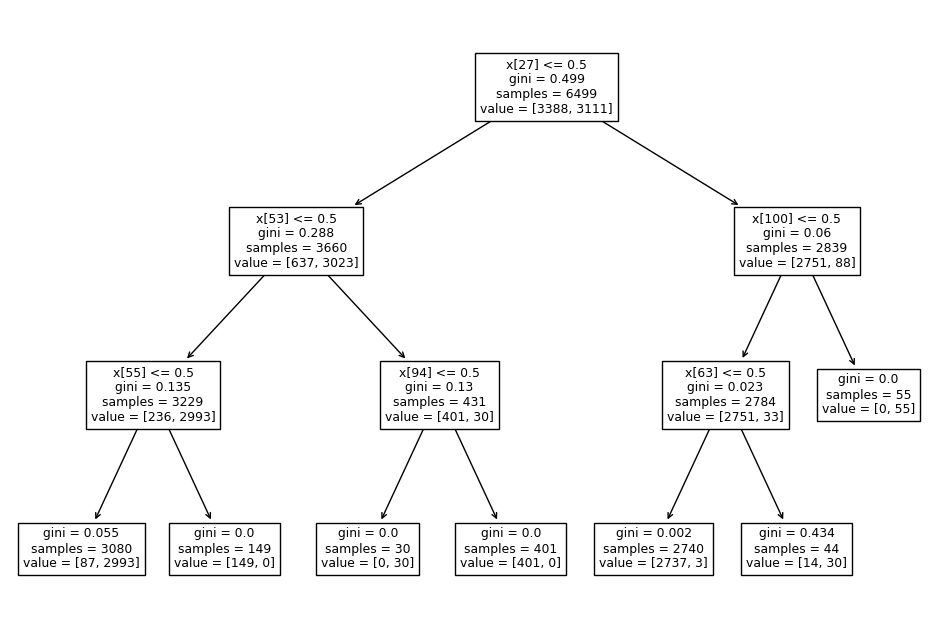

In [18]:
plt.figure(figsize=(12,8))
tree.plot_tree(clf_gini.fit(x_train,y_train))

In [19]:
y_pred_gini = clf_gini.predict(x_test)

In [20]:
y_pred_train_gini = clf_gini.predict(x_train)
y_pred_train_gini

array([0, 0, 1, ..., 1, 1, 1])

In [21]:
print("model accuracy giniye göre: {0:0.4f}".format(accuracy_score(y_test,y_pred_gini)))
print("training set accuracy score: {0:0.4f}".format(accuracy_score(y_train,y_pred_train_gini)))

model accuracy giniye göre: 0.9902
training set accuracy score: 0.9840


In [22]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

In [23]:
cm = confusion_matrix(y_test, y_pred_gini)
print("confusion matrix\n\n", cm)

confusion matrix

 [[809  11]
 [  5 800]]


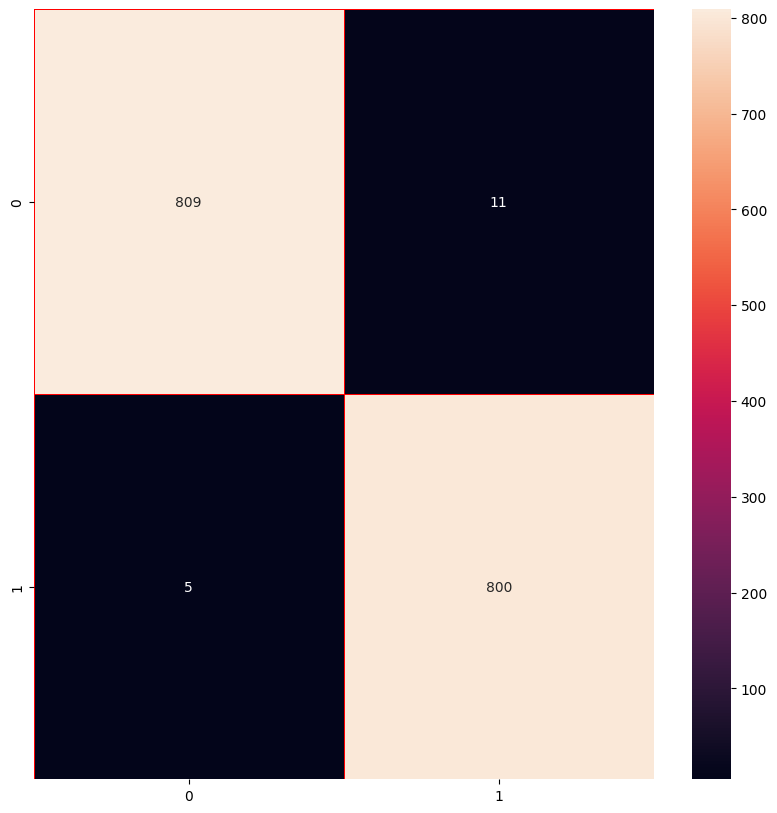

<Figure size 640x480 with 0 Axes>

In [24]:
f,ax = plt.subplots(figsize=(10,10))
sns.heatmap(cm, annot=True, linewidths=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.show()
plt.savefig("confusion matrix")

In [25]:
print(classification_report(y_test, y_pred_gini))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       820
           1       0.99      0.99      0.99       805

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625



In [26]:
f1_score= f1_score(y_test, y_pred_gini)
print("f1 score", f1_score)

f1 score 0.9900990099009901
